In [1]:
#libraries
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pylab as pl
%matplotlib inline

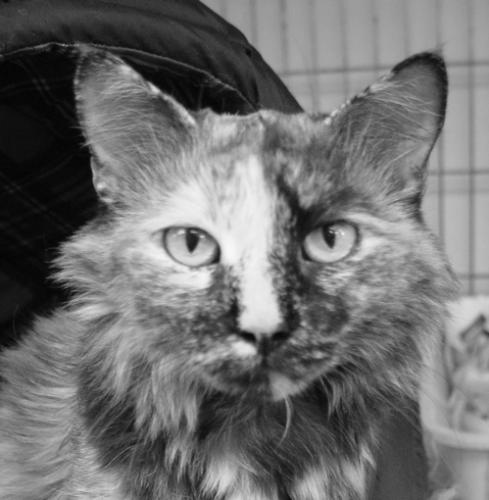

In [65]:
#import image a
pil_im = Image.open("D:/AI_Machinlearning/datasets/animal/cat_dog/Cat/10.jpg")

#convert image to greyscale mode
grey_img= pil_im.convert(mode="L")

grey_img



In [66]:
#conver jpg to matrix
img_matrix=np.asarray(gray_img)

print(img_matrix.shape)

(500, 489)


In [67]:
img_matrix

array([[ 29,  27,  23, ..., 149, 148, 147],
       [ 33,  32,  29, ..., 149, 148, 147],
       [ 35,  38,  39, ..., 149, 149, 146],
       ...,
       [143, 142, 136, ..., 152, 149, 144],
       [141, 141, 138, ..., 153, 150, 143],
       [144, 143, 142, ..., 153, 151, 144]], dtype=uint8)

In [136]:
#mean
mean=img_matrix.mean()
mean

111.88622903885481

In [137]:
#standard deviation
std=img_matrix.std()
std

57.32639674473587

In [72]:
#horizontal
kernel=np.array([[-1,-2,-1],
                  [0 ,0, 0],
                  [1, 2,1]])
                 

In [73]:
#first Convolution
conv=convolve2d(img_matrix , kernel ,boundary='symm', mode='same')

conv.shape

(500, 489)

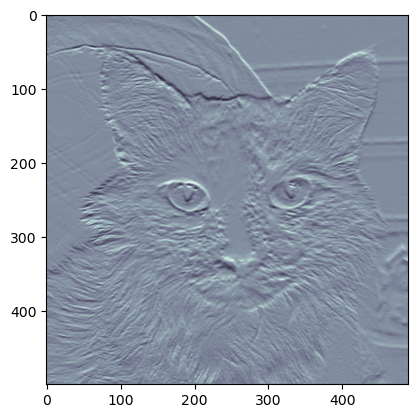

In [74]:
plt.imshow(conv ,alpha=0.9 ,  cmap="bone")   #https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()


In [75]:
#vertical
kernel2=np.array([[-1,0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

In [76]:
#second Convolution
conv2=convolve2d(conv , kernel2 ,boundary='symm', mode='same')

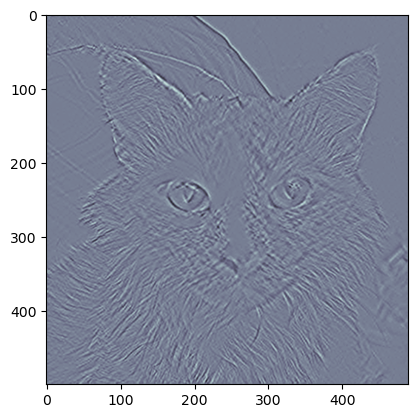

In [77]:
plt.imshow(conv2 , interpolation='mitchell', cmap="bone" , alpha=0.9)
plt.show()


In [78]:
#diagonal
kernel3=np.array([[-3,5,5],
                 [-3,0,5],
                 [-3,-3,-3]])

In [79]:
#third Convolution
conv3=convolve2d(conv2 , kernel3 ,boundary='symm', mode='same')

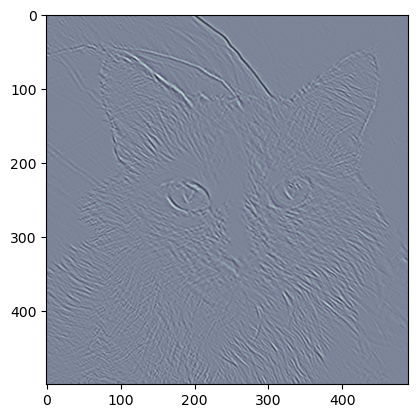

In [81]:
plt.imshow(conv3 , interpolation='mitchell', cmap="bone" , alpha=0.9)
plt.show()


In [106]:
#concatenate 3 metrices
new_layer=np.dstack((conv , conv2 , conv3))

In [150]:
new_layer.shape

(500, 489, 3)

In [144]:
maxValue = np.amax(new_layer)
minValue = np.amin(new_layer)

print( maxValue , minValue , new_layer.mean())


14358 -13745 -0.0945276073619632


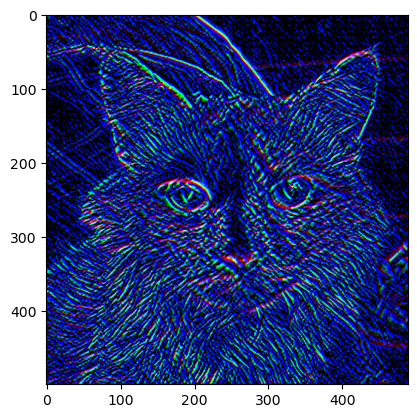

In [152]:
Image = np.clip(new_layer, 0, 255)

plt.imshow(Image)